In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
DATA_FOLDER="/Users/kangb3/github/project_spring_2020_dup/data/import/"
EXP_FNAME = os.path.join(DATA_FOLDER, "exprs_mtx.txt")
META_FNAME = os.path.join(DATA_FOLDER, "metatable.txt")

In [4]:
metadata = pd.read_table(META_FNAME, sep = '\t', index_col = 0)
randomcells = pd.read_csv('./data/export/randomcells.csv', header = None)
mtx_orig = pd.read_table(EXP_FNAME, sep = '\t', index_col = 0)
mtx_small = pd.read_table( './data/export/mtx_small.txt', sep = '\t', index_col = 0)

In [5]:
mtx_small.columns

Index(['GGCCCATGGACC', 'CCAGATGACGCT', 'GGCGCTCCTATN', 'GGAAAGAGAATC',
       'ATTGGTTGATTT', 'GTGAGACTTGTA', 'GGTTCGTCAAGC', 'ATAGTTCTTCAG',
       'CTTATCGTATAA', 'CCAAAAACACCG',
       ...
       'AGGCATTCGGAG', 'AAACCTTATGTT', 'ACCTGGGTATTN', 'CTTCGACTTTCC',
       'GCAAGCCTCACT', 'AAGACGCGTGAG', 'TCTCGTTGTTGT', 'TAGAAGATAATA',
       'GGCCATCTGGTN', 'Unnamed: 145'],
      dtype='object', length=145)

In [6]:
# Preview Data
pd.set_option('display.max_columns', None) # Show All Columns in Preview
display(metadata.head(n=5))
display(pd.crosstab(index=metadata['cluster'], columns='count'))

,cell.id,cluster,orig.cell.id,tSNE_1,tSNE_2
GF_TAGCAAGTTTGN,TAGCAAGTTTGN,5,GF_TAGCAAGTTTGN,-40.595545,8.234916
GF_AAGCGTGGCTCN,AAGCGTGGCTCN,5,GF_AAGCGTGGCTCN,-35.416128,8.728935
GF_GGCATTTCCTTT,GGCATTTCCTTT,5,GF_GGCATTTCCTTT,-39.249410,11.251672
GF_GGGCTCCGAGAC,GGGCTCCGAGAC,5,GF_GGGCTCCGAGAC,-42.131106,5.344137
GF_AGAGTCCAAACC,AGAGTCCAAACC,5,GF_AGAGTCCAAACC,-39.818166,7.485573


col_0,count
cluster,
0,200
1,200
2,200
3,200
4,200
5,200
6,200
7,200
8,200


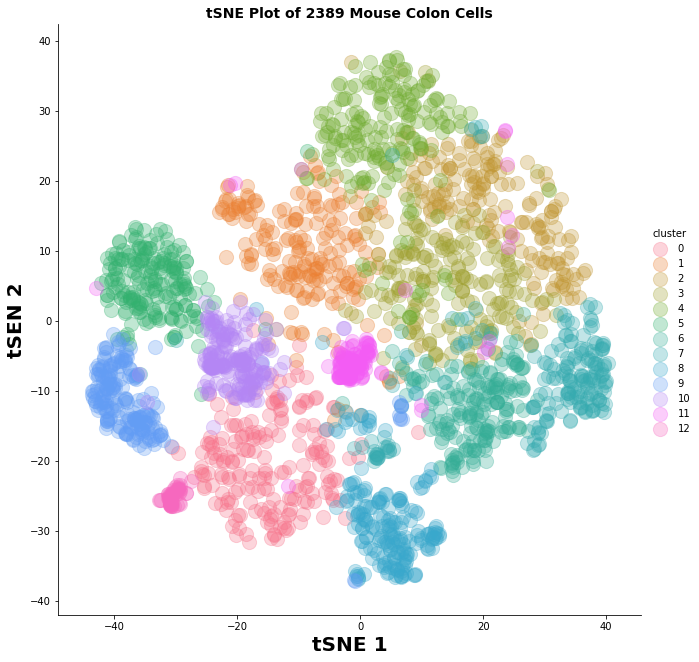

In [7]:
sns.lmplot(x='tSNE_1',
           y='tSNE_2',
           data=metadata,
           fit_reg=False,
           legend=True,
           height=9,
           hue='cluster',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('tSNE Plot of 2389 Mouse Colon Cells', weight='bold').set_fontsize('14')
plt.xlabel('tSNE 1', weight='bold').set_fontsize('20')
plt.ylabel('tSEN 2', weight='bold').set_fontsize('20')

Dataframe Parsing

In [10]:
column_names = metadata.columns
df = pd.DataFrame([], columns = column_names)

# Method1
metadata.index = metadata['cell.id']
new_meta = metadata[ metadata.index.isin( mtx_small.columns ) ]

# Method2
for i in mtx_small.columns:
    a = metadata.loc[ metadata['cell.id'].str.contains(i)]
    df = df.append(a)

# Method3
metadata.index = [x for x in range(0, len(metadata.index))]
metadata.index = metadata['cell.id']
df = metadata.loc[mtx_small.columns].copy()
df = df.iloc[0:144,:]

In [157]:
df

,cell.id,cluster,orig.cell.id,tSNE_1,tSNE_2
GGCCCATGGACC,GGCCCATGGACC,0,WT_GGCCCATGGACC,-18.517429,-30.392917
CCAGATGACGCT,CCAGATGACGCT,0,WT_CCAGATGACGCT,-22.647728,-13.665912
GGCGCTCCTATN,GGCGCTCCTATN,0,GF_GGCGCTCCTATN,-19.895339,-24.077337
GGAAAGAGAATC,GGAAAGAGAATC,0,GF_GGAAAGAGAATC,-18.086949,-31.628854
ATTGGTTGATTT,ATTGGTTGATTT,0,GF_ATTGGTTGATTT,-21.585091,-25.874960
GTGAGACTTGTA,GTGAGACTTGTA,0,WT_GTGAGACTTGTA,-8.224278,-22.497152
GGTTCGTCAAGC,GGTTCGTCAAGC,0,WT_GGTTCGTCAAGC,-9.249729,-27.625790
ATAGTTCTTCAG,ATAGTTCTTCAG,0,GF_ATAGTTCTTCAG,-2.398252,-28.165787
CTTATCGTATAA,CTTATCGTATAA,0,WT_CTTATCGTATAA,-24.686171,-21.684165
CCAAAAACACCG,CCAAAAACACCG,0,GF_CCAAAAACACCG,-14.509606,-15.601995


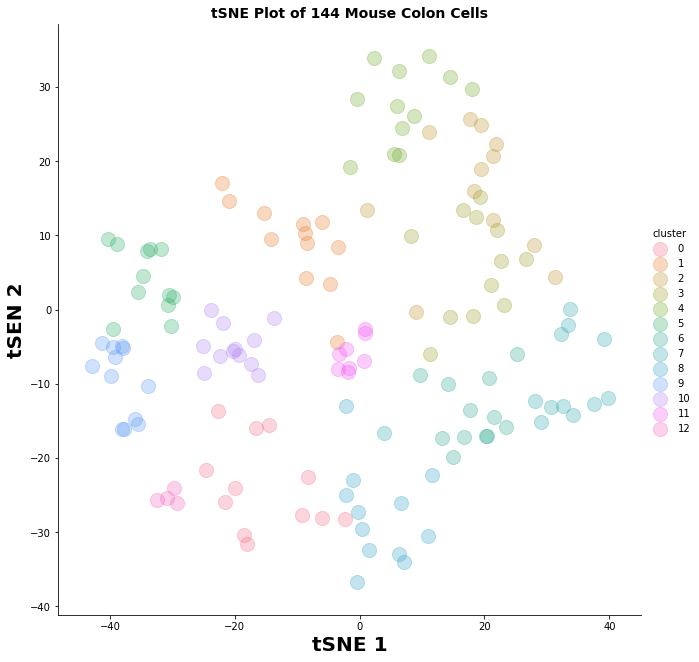

In [158]:
sns.lmplot(x='tSNE_1',
           y='tSNE_2',
           data=df,
           fit_reg=False,
           legend=True,
           height=9,
           hue='cluster',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('tSNE Plot of 144 Mouse Colon Cells', weight='bold').set_fontsize('14')
plt.xlabel('tSNE 1', weight='bold').set_fontsize('20')
plt.ylabel('tSEN 2', weight='bold').set_fontsize('20')